In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pickle 

word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings)

243

In [2]:
def vec(w):
    return word_embeddings[w]

In [3]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words])
print(bag2d.shape) 
# We will reduce this to (11,2) using PCA 

(11, 300)


In [4]:
data = pd.DataFrame(bag2d,index = words)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
gas,-0.161133,0.105469,-0.138672,0.010803,0.017090,-0.041504,-0.145508,-0.341797,-0.028564,0.184570,...,-0.111328,-0.218750,-0.203125,0.140625,-0.041992,0.026611,0.120605,0.255859,0.202148,-0.019287
happy,-0.000519,0.160156,0.001610,0.025391,0.099121,-0.085938,0.324219,-0.021729,0.134766,0.110352,...,-0.109863,0.107910,-0.070312,-0.127930,-0.050781,0.042725,-0.073242,-0.035400,0.088867,-0.302734
sad,0.189453,0.045898,0.066895,-0.044678,0.178711,0.019653,0.347656,-0.024658,0.406250,0.105957,...,-0.145508,0.033447,0.000477,0.146484,-0.146484,0.033936,-0.052490,-0.062012,0.082520,-0.025513
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375


In [5]:
def compute_pca(X, n_components,words):
    # mean center the data
    X_demeaned = X - np.mean(X,axis=0)
    
    # calculate the covariance matrix - this is our transformation
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)
    
    # Number of features in dataset (number of columns - 300) = Number of dimensions of the vector for each eigen value
    # total eigen values - 300
    # Therefore eigen_vecs - (300,300)
    
    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]
    
    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    # select the first n eigenvectors 
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]

    # eigen_vecs_subset.shape - 300,2
    # X_demeaned.shape - 11,300
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()

    dataset = pd.DataFrame(X_reduced,index=words)
    return dataset

In [6]:
data_reduced = compute_pca(data,2,words)
data_reduced

,0,1
oil,2.074031,0.226565
gas,1.844124,0.038569
happy,-1.019730,1.268881
sad,-1.175787,1.760764
city,-0.601780,-1.093241
town,-0.855811,-1.296162
village,-0.990526,-1.612222
country,-0.318020,-0.415334
continent,-0.210693,-0.575926
petroleum,2.313584,0.297835


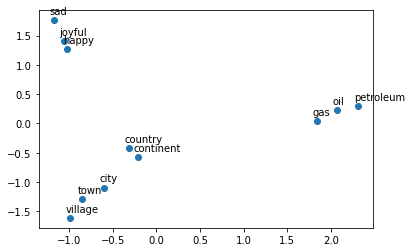

In [7]:
plt.scatter(data_reduced[0], data_reduced[1])
for i, word in enumerate(words): # destructures into index and word
    plt.annotate(word, xy=(data_reduced.iloc[i,0] - 0.05, data_reduced.iloc[i,1] + 0.1))

plt.show()
# Similar Words Clubbed Together